In [17]:
# @title
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2, kstest
import pandas as pd

# Tarea 1 : Constante de Boltzmann
## Integrantes:
Juan José García gil

Juan Sebastián Gallón

Leonardo Ortega Trujillo

Darío Penagos

Estefanía Zapata Valderrama

---

Objetivo: Determinar la constante de Boltzmann a partir de los datos medidos de corriente y voltaje en el diodo a diferentes temperaturas

- Ajustar la constante de Boltzmann,el parámetro n del semiconductor y el parámetro Is de la corriente de saturación.
- Hacer la comprobación del ajuste de los datos al modelo teórico mediante el criterio de chi cuadrado o de Kolmogorov Smirnoff.


---
# Comportamiento Eléctrico de un Diodo: La Ecuación de Shockley

El comportamiento eléctrico de un **diodo semiconductor** puede describirse a partir de la **ecuación de Shockley**, que relaciona la corriente que circula a través del diodo con la tensión aplicada. Este modelo surge del transporte de portadores de carga en la unión p–n y tiene una fuerte dependencia con la temperatura, lo que permite estudiar propiedades fundamentales del material.

Matemáticamente, la ecuación del diodo se expresa como:

$$
I(V_d) = I_s \left( e^{\frac{qV_d}{nkT}} - 1 \right)
$$

donde:

- $I$: corriente a través del diodo (A)
- $I_s$: corriente de saturación (A)
- $q = 1.602176634 \times 10^{-19} \, \text{C}$: carga del electrón
- $n$: factor de idealidad (adimensional)
- $k$: constante de Boltzmann que queremos ajustar (J/K)
- $T$: temperatura (K)
- $V_d$: tensión en el diodo (V)


A partir de esta relación, es posible determinar experimentalmente la **constante de Boltzmann** ajustando el modelo teórico a los datos medidos de corriente y voltaje en un diodo a diferentes temperaturas. Este ajuste también permite obtener los parámetros $I_s$ y $n$, que describen las características del semiconductor y las pérdidas no ideales del dispositivo.

El análisis consiste en registrar las curvas $I-V$ del diodo a distintas temperaturas, realizar un ajuste no lineal mediante la ecuación de Shockley y evaluar la bondad del ajuste utilizando criterios estadísticos como el coeficiente de determinación $R^2$ o el test de chi cuadrado. De esta forma, se conecta un experimento de electrónica básica con una de las constantes fundamentales de la física, que relaciona la energía térmica con la temperatura.

###Datos medidos por el equipo y parametros

In [2]:
#Temperatura Ambiente: 23.1 C, 25 datos
v_a_maquina = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5
]) #Voltios
v_a_voltimetro = np.array([99.7, 199.6, 287.8, 333.9, 381, 396.2, 407, 415, 421, 427, 432, 436, 440, 444, 447, 450, 453, 456, 459, 461, 463, 465, 466, 470, 472
]) #miliVoltios
i_a_amperimetro = np.array([0, 0.29, 8.9, 50.6, 279, 475, 679, 888, 1108, 1324, 1541, 1759, 1983, 2208, 2435, 2661, 2885, 3107, 3334, 3562, 3791, 4015, 4234, 4464, 4694
]) #microAmperios


#Temperatura Nitrogeno = -170.3 C, 23 datos
v_n_maquina = np.array([0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5
]) #Voltios
v_n_voltimetro = np.array([99.5, 299, 500, 600, 699, 796, 888, 931, 961, 969, 974, 978, 981, 983, 985, 987, 989, 990, 992, 993, 993, 994, 996
]) #miliVoltios
i_n_amperimetro = np.array([0.01, 0.02, 0.04, 0.05, 0.06, 0.36, 8, 49.15, 310, 520, 743, 966, 1194, 1422, 1648, 1872, 2101, 2331, 2562, 2788, 3012, 3240, 3471
]) #microAmperios


# Parámetros
q = 1.602e-19  # Carga del electrón en Coulombs
k_boltzmann = 1.38064852e-23  # Constante de Boltzmann en J/K

T_a = 23.1 + 273.15  # Temperatura ambiente en Kelvin
T_n = -170.3 + 273.15  # Temperatura con nitrogeno en Kelvin

#Covertir a S.I datos temperatura ambiente
v_a_medidos = v_a_voltimetro*1e-3  # Convertir a voltios
i_a_medidos = i_a_amperimetro*1e-6  # Convertir a Amperios

#Covertir a S.I datos temperatura ambiente
v_n_medidos = v_n_voltimetro*1e-3  # Convertir a voltios
i_n_medidos = i_n_amperimetro*1e-6  # Convertir a Amperios



In [3]:
def ecuacion_diodo(Vd,T, k, n, Is):
    """
    Modelo del diodo según la ecuación de Shockley.

    Parámetros:
    Vd : Voltaje en el diodo (V)
    Is : Corriente de saturación (A)
    n : Factor de idealidad (adimensional)
    k : Constante de Boltzmann (J/K)
    T : Temperatura (K)

    Retorna:
    I : Corriente a través del diodo (A)
    """
    return Is * (np.exp((q * Vd) / (n * k * T)) - 1)


#Graficos datos experimentales

/tmp/ipython-input-1266345213.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/tmp/ipython-input-1266345213.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


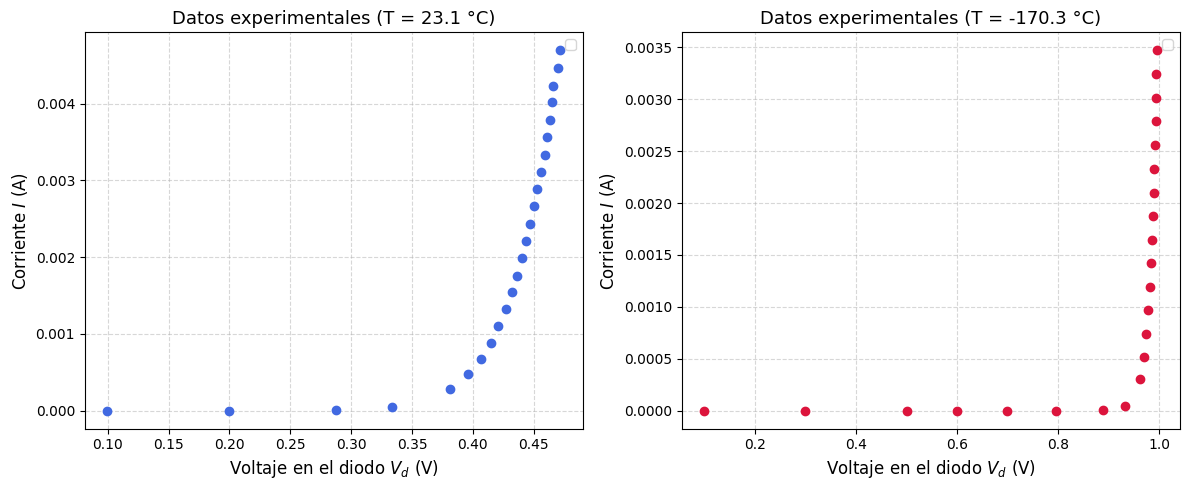

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Gráfico 1: T = 23.1 °C
axes[0].plot(v_a_medidos,i_a_medidos, 'o', color='royalblue')
axes[0].set_title('Datos experimentales (T = 23.1 °C)', fontsize=13)
axes[0].set_xlabel('Voltaje en el diodo $V_d$ (V)', fontsize=12)
axes[0].set_ylabel('Corriente $I$ (A)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend()

#Gráfico 2: T = -170.3 °C
axes[1].plot(v_n_medidos,i_n_medidos, 'o', color='crimson')
axes[1].set_title('Datos experimentales (T = -170.3 °C)', fontsize=13)
axes[1].set_xlabel('Voltaje en el diodo $V_d$ (V)', fontsize=12)
axes[1].set_ylabel('Corriente $I$ (A)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend()

plt.tight_layout()
plt.show()

#Ajuste de parametros K, n, Is con curvefit

In [5]:
param_inicial = [1.38e-23,1.5,1e-12]  # Valores iniciales
params, cov = curve_fit(lambda Vd,k,n,Is:ecuacion_diodo(Vd,T_a,k,n,Is),
                        v_a_medidos,i_a_medidos,p0=param_inicial)

k_ajustado, n_ajustado, Is_ajustada = params

print(f"k ajustada  = {k_ajustado:.3e} J/K")
print(f"n ajustado  = {n_ajustado:.3f}")
print(f"Is ajustado = {Is_ajustada:.3e} A")

k ajustada  = 1.324e-23 J/K
n ajustado  = 1.439
Is ajustado = 7.369e-09 A


In [6]:
param_inicial_n = [1.38e-23,1.5,1e-15]  # Valores iniciales
params_n, cov = curve_fit(
    lambda Vd,k,n,Is: ecuacion_diodo(Vd,T_n,k,n,Is),
    v_n_medidos, i_n_medidos,
    p0=param_inicial_n,
    bounds=([1e-23, 0.5, 1e-18], [2e-23, 3.0, 1e-6]),
    maxfev=10000
)

k_ajustado_n,n_ajustado_n,Is_ajustada_n = params_n

print(f"k ajustada  = {k_ajustado_n:.3e} J/K")
print(f"n ajustado  = {n_ajustado_n:.3f}")
print(f"Is ajustado = {Is_ajustada_n:.3e} A")

k ajustada  = 1.500e-23 J/K
n ajustado  = 1.500
Is ajustado = 1.000e-10 A


#Grafico con el ajuste

/tmp/ipython-input-3575065266.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axes[0].plot(v_a_medidos,Iaj, 'r', color='darkblue', label='Mejor Ajuste')
/tmp/ipython-input-3575065266.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes[0].plot(v_a_medidos,i_a_medidos,'-o',linestyle='none',label='Datos Experimentales', color ='royalblue')
/tmp/ipython-input-3575065266.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axes[1].plot(v_n_medidos,Iaj_n, 'r', color='crimson', label='Mejor Ajuste')
/tmp/ipython-input-3575065266.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argu

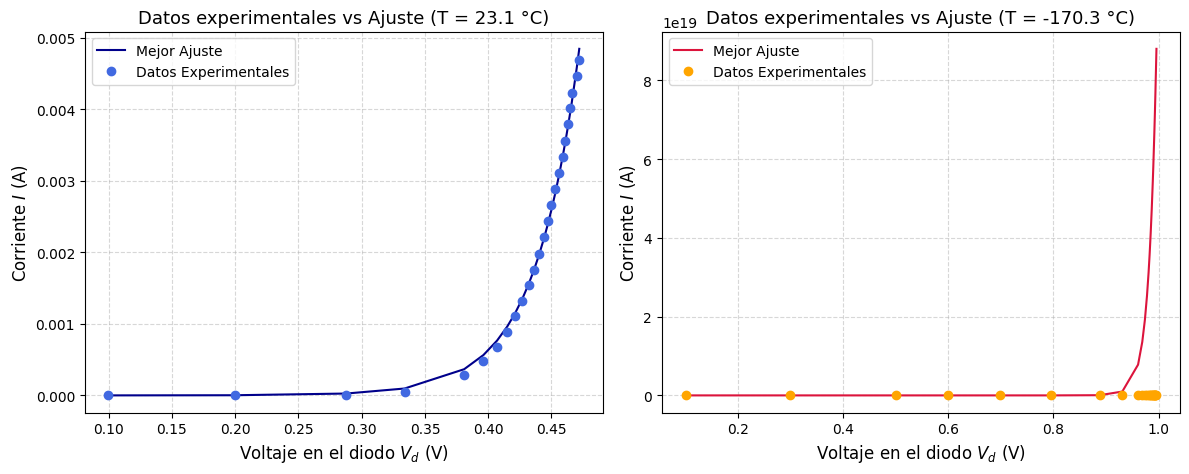

In [7]:
Iaj=ecuacion_diodo(v_a_medidos,T_a,k_ajustado,n_ajustado,Is_ajustada)
Iaj_n=ecuacion_diodo(v_n_medidos,T_n,k_ajustado_n,n_ajustado_n,Is_ajustada_n)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Gráfico 1: T = 23.1 °C
axes[0].plot(v_a_medidos,Iaj, 'r', color='darkblue', label='Mejor Ajuste')
axes[0].plot(v_a_medidos,i_a_medidos,'-o',linestyle='none',label='Datos Experimentales', color ='royalblue')
axes[0].set_title('Datos experimentales vs Ajuste (T = 23.1 °C)', fontsize=13)
axes[0].set_xlabel('Voltaje en el diodo $V_d$ (V)', fontsize=12)
axes[0].set_ylabel('Corriente $I$ (A)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(loc='best')

#Gráfico 2: T = -170.3 °C
axes[1].plot(v_n_medidos,Iaj_n, 'r', color='crimson', label='Mejor Ajuste')
axes[1].plot(v_n_medidos,i_n_medidos,'-o',linestyle='none',label='Datos Experimentales', color='orange')
axes[1].set_title('Datos experimentales vs Ajuste (T = -170.3 °C)', fontsize=13)
axes[1].set_xlabel('Voltaje en el diodo $V_d$ (V)', fontsize=12)
axes[1].set_ylabel('Corriente $I$ (A)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

# Bondad del ajuste

In [8]:
#Bondad del ajuste T= 23.1
def r_sqr(i_a_medidos,Iaj):

  return 1-sum((i_a_medidos-Iaj)**2)/sum((i_a_medidos-np.mean(i_a_medidos))**2)
print('R^2 = ', r_sqr(i_a_medidos,Iaj))

R^2 =  0.9981547289310849


El ajuste de los datos a la exponencial de Shockley es muy buena, el valor de la constante $k$ que calculamos es cercano al real, coincidiendo con el valor teórico con un error de menos del 1%. Las mínimas desviaciones observadas en voltajes bajos no son significativas y probablemente se deben a ruido del instrumento o a efectos de la resistencia.

In [9]:
#Bondad del ajuste T= -170.3
def r_sqr(i_n_medidos,Iaj_n):

  return 1-sum((i_n_medidos-Iaj_n)**2)/sum((i_n_medidos-np.mean(i_n_medidos))**2)
print('R^2 = ', r_sqr(i_n_medidos,Iaj_n))

R^2 =  -1.2878835938815868e+45


El primer ajuste no es muy bueno,hay errores en altos voltajes quiza por efectos de ruido, problemas con la resistencia o efectos de congelamiento en instrumentos, lo que impide una estimación fiable de los parametros.

# Ahora hacemos el analisis para los datos tomados por el profesor

In [45]:
# Modelo de corriente del diodo
def modelo_diodo(V, Is, n, kB):
    q = 1.602e-19
    T = modelo_diodo.T_actual
    return Is * (np.exp(q * V / (n * kB * T)) - 1)

# Función principal
def ajustar_diodo(nombre_archivo, T_celsius):
    print(f"\n=== AJUSTE PARA {T_celsius} C ===\n")

    # 1. Leer desde fila 10 sin encabezado
    df = pd.read_excel(nombre_archivo, skiprows=9, header=None)

    # 2. Tomar las columnas correctas (corriente y voltaje)
    I = pd.to_numeric(df.iloc[:, 0], errors='coerce')
    V = pd.to_numeric(df.iloc[:, 13], errors='coerce')

    # 3. Eliminar filas vacías o inválidas
    mask = np.isfinite(I) & np.isfinite(V)
    I, V = I[mask], V[mask]

    if len(I) == 0:
        print("⚠️ No se pudieron extraer datos válidos.")
        return

    # 4. Temperatura absoluta
    T = T_celsius + 273.15
    modelo_diodo.T_actual = T

    # 5. Ajuste
    p0 = [1e-12, 1.0, 1.38e-23]
    popt, pcov = curve_fit(modelo_diodo, V, I, p0=p0, maxfev=10000)
    Is_fit, n_fit, kB_fit = popt
    perr = np.sqrt(np.diag(pcov))

    # 6. Evaluación
    I_fit = modelo_diodo(V, *popt)
    chi2_val = np.sum(((I - I_fit) ** 2) / np.abs(I_fit))
    dof = len(I) - len(popt)
    p_chi2 = 1 - chi2.cdf(chi2_val, dof)
    ks_stat, ks_p = kstest(I, I_fit)

    # 7. Resultados
    print(f"T (K): {T:.2f}")
    print(f"Is = {Is_fit:.3e} ± {perr[0]:.3e} A")
    print(f"n  = {n_fit:.3f} ± {perr[1]:.3f}")
    print(f"kB = {kB_fit:.3e} ± {perr[2]:.3e} J/K")
    print(f"χ² = {chi2_val:.3e} | p(χ²) = {p_chi2:.4f}")
    print(f"K–S: D = {ks_stat:.4f} | p = {ks_p:.4f}")

    # 8. Gráfico
    plt.figure(figsize=(7,5))
    plt.scatter(V, I, s=20, color='orange', label='Datos experimentales')
    plt.plot(V, I_fit, 'b-', label='Ajuste teórico')
    plt.xlabel('Voltaje [V]')
    plt.ylabel('Corriente [A]')
    plt.title(f'Ajuste I–V a {T_celsius} °C')
    plt.legend()
    plt.grid(True)
    plt.show()


## Ajuste para T = 24.7 C


=== AJUSTE PARA 24.7 C ===

T (K): 297.85
Is = 3.655e-06 ± 3.666e-07 A
n  = 1.452 ± 176229.319
kB = 2.332e-23 ± 2.830e-18 J/K
χ² = 5.640e-02 | p(χ²) = 1.0000
K–S: D = 0.3420 | p = 0.0000


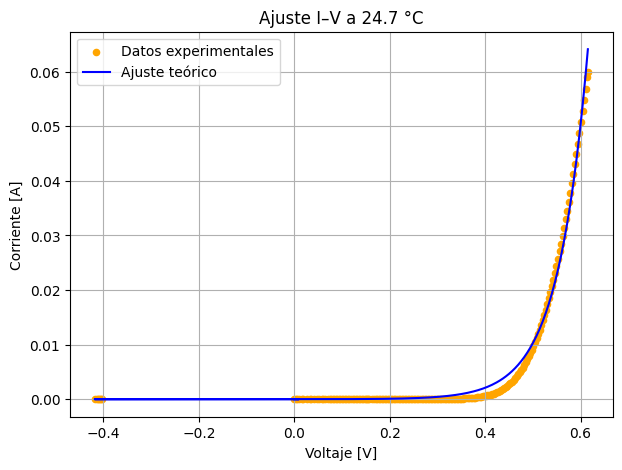

In [46]:
ajustar_diodo("/ambiente_profe.xlsx", 24.7)

Para T=24.7°C, el ajuste es bueno , pero kB sobreestimada y datos con ruido en bajos I o colinealidad.


=== AJUSTE PARA -173.2 C ===

T (K): 99.95
Is = 4.162e-19 ± inf A
n  = 101.002 ± inf
kB = -1.366e-21 ± inf J/K
χ² = 2.726e+18 | p(χ²) = 0.0000
K–S: D = 0.8423 | p = 0.0000


/tmp/ipython-input-534086368.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(modelo_diodo, V, I, p0=p0, maxfev=10000)


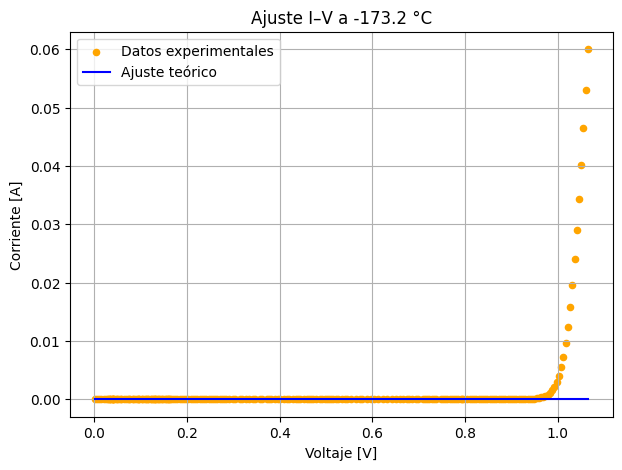

In [47]:

ajustar_diodo("/frio_profe.xlsx", -173.2)

Para T=-173.2°C, el ajuste no es bueno, kB negativa, debido a datos dominados por no-idealidades a bajas T.

# Conclusion general

El análisis muestra que los ajustes del modelo de Shockley son válidos y buenos para describir el diodo a temperatura ambiente, lo que nos arroja un valor de la constante de Boltzmann ($k$) razonable, aunque con alta incertidumbre numérica. Sin embargo, los ajustes a baja temperatura fallaron por completo, principalmente por la influencia de factores externos como el ruido en corrientes muy bajas o lo complejo de utilizar un modelo ideal como lo es el modelo de Shockley para el estudio de este diodo ya que su comportamiento cambia dependiendo de la temperatura.
Para  la estimación fiable de $k$ en condiciones frías se requiere refinamientos como el uso de un modelo mejor que incluya por ejemplo la resistencia o una mejor toma de datos.